In [29]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path

df=pd.read_csv(r'C:\Users\HP\OneDrive\Applied ai\Module 2\Assignment\haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head(10)

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [3]:
print(df.shape)



(306, 4)


In [4]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [5]:
df['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: age, dtype: int64

In [6]:
df['operation_Year'].value_counts()

58    36
64    31
63    30
60    28
65    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: operation_Year, dtype: int64

In [7]:
df['axil_nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
11      4
14      4
19      3
23      3
22      3
15      3
10      3
20      2
12      2
17      1
18      1
16      1
21      1
24      1
25      1
28      1
30      1
35      1
46      1
52      1
Name: axil_nodes, dtype: int64

In [8]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

The given Haberman's data consists of study on breast cancer patients who had undergone surgery.
The attributes recorded in data are:
age : Patient's age (numerical value)
operation_Year : year of operation (numerical value)
axil_nodes : refers to number of axillary nodes to treat detected (numerical value)
survival_status : after surgery if patient survived 5 years or longer = 1, after surgery if patient died within 5 years = 2 (class attribute)
There are no missing values.
The objective is to classify survival_status based on age, operation_Year and axil_nodes.

### Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

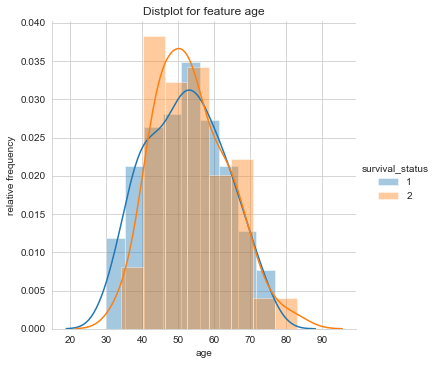

In [53]:
sns.FacetGrid(df, hue = 'survival_status', size = 5).map(sns.distplot, 'age').add_legend()
plt.ylabel("relative frequency")
plt.title("Distplot for feature age")
plt.show()

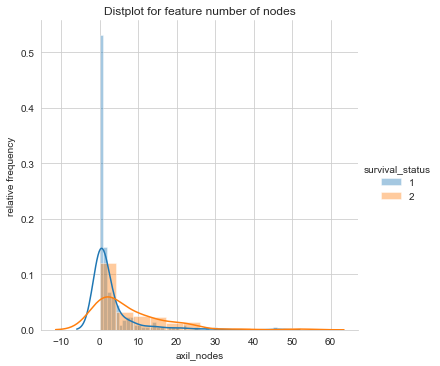

In [52]:
sns.FacetGrid(df, hue = 'survival_status', size = 5).map(sns.distplot, 'axil_nodes').add_legend()
plt.ylabel("relative frequency")
plt.title("Distplot for feature number of nodes")
plt.show()


As can be seen that highest survival status = 1 is at 0 to 10 nodes.

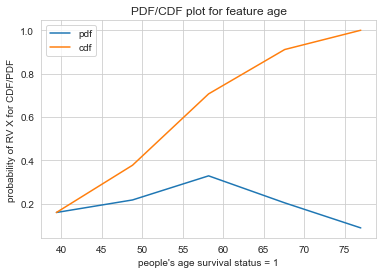

In [51]:
age1 = df.loc[df['survival_status'] == 1]
count1, bin1 = np.histogram(age1['age'], bins=5, density= True)

pdf1 = count1/sum(count1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin1[1:], pdf1, label = 'pdf')
plt.plot(bin1[1:],cdf1, label = 'cdf')
plt.legend()
plt.ylabel("probability of RV X for CDF/PDF")
plt.xlabel('people\'s age survival status = 1')
plt.title('PDF/CDF plot for feature age')
plt.show()

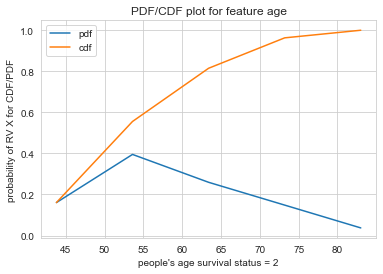

In [50]:
age2 = df.loc[df['survival_status'] == 2]
count1, bin1 = np.histogram(age2['age'], bins=5, density= True)

pdf1 = count1/sum(count1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin1[1:], pdf1, label = 'pdf')
plt.plot(bin1[1:],cdf1, label = 'cdf')
plt.legend()
plt.ylabel("probability of RV X for CDF/PDF")
plt.xlabel('people\'s age survival status = 2')
plt.title('PDF/CDF plot for feature age')
plt.show()

pdf of age behaves similar to normal distribution which was expected. Survival status = 1 was found more in people between age 50 to 55 and Survival status = 2 was found more in people between age 55 to 60.

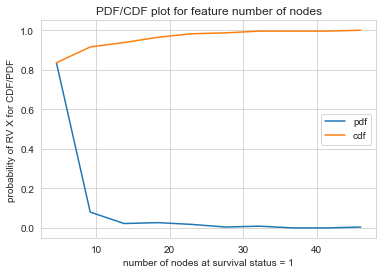

In [48]:
axil1 = df.loc[df['survival_status'] == 1]
count1, bin1 = np.histogram(axil1['axil_nodes'], bins=10, density= True)

pdf1 = count1/sum(count1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin1[1:], pdf1, label = 'pdf')
plt.plot(bin1[1:],cdf1, label = 'cdf')
plt.legend()
plt.ylabel("probability of RV X for CDF/PDF")
plt.xlabel('number of nodes at survival status = 1')
plt.title('PDF/CDF plot for feature number of nodes')
plt.show()

Less than around 5% of people had more than 15 nodes. around 90% of people with survival status 1 had 0 to 10 nodes.


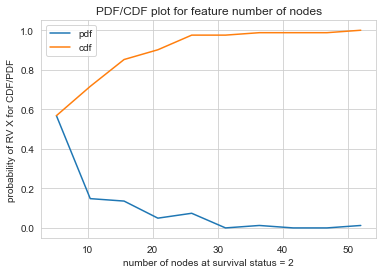

In [47]:
axil1 = df.loc[df['survival_status'] == 2]
count1, bin1 = np.histogram(axil1['axil_nodes'], bins=10, density= True)

pdf1 = count1/sum(count1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin1[1:], pdf1, label = 'pdf')
plt.plot(bin1[1:],cdf1, label = 'cdf')
plt.legend()
plt.ylabel("probability of RV X for CDF/PDF")
plt.xlabel('number of nodes at survival status = 2')
plt.title('PDF/CDF plot for feature number of nodes')
plt.show()

Around 70% of people with survival status 2 had 0 to 10 nodes.

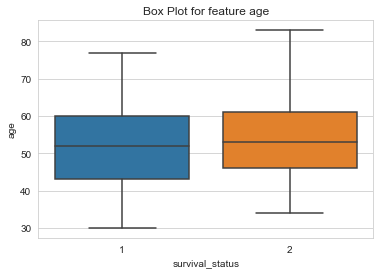

In [46]:
sns.set_style("whitegrid")
sns.boxplot(x= 'survival_status', y= 'age', data = df)
plt.title('Box Plot for feature age')
plt.show()


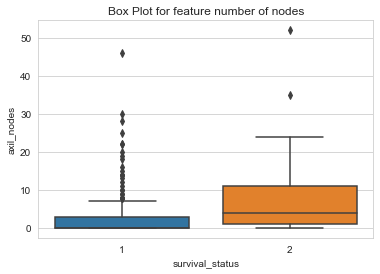

In [45]:
sns.set_style("whitegrid")
sns.boxplot(x= 'survival_status', y= 'axil_nodes', data = df)
plt.title('Box Plot for feature number of nodes')
plt.show()

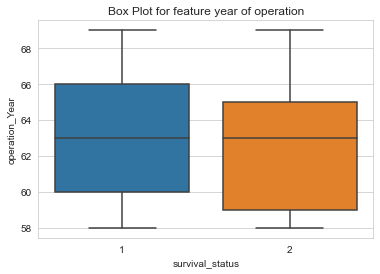

In [44]:
sns.set_style("whitegrid")
sns.boxplot(x= 'survival_status', y= 'operation_Year', data = df)
plt.title('Box Plot for feature year of operation')
plt.show()

large number of outliers are present in axil_nodes for survival status 1

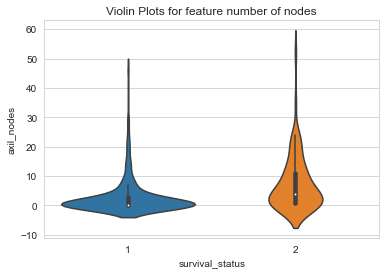

In [43]:
sns.set_style("whitegrid")
sns.violinplot(x= 'survival_status', y = 'axil_nodes', data = df, size = 8)
plt.title('Violin Plots for feature number of nodes')
plt.show()

Number of nodes are higher in patients with survival status 2.

In [19]:
df_1 = df.loc[df['survival_status'] == 1]
df_2 = df.loc[df['survival_status'] == 2]
print("Mean and std dev values: survival status = 1")
print('mean age', np.mean(df_1['age']))
print('mean nodes', np.mean(df_1['axil_nodes']))
print('std dev age', np.std(df_1['age']))
print('std dev nodes', np.std(df_1['axil_nodes']))
print('\n')
print("Mean and std dev values: survival status = 2")
print('mean age', np.mean(df_2['age']))
print('mean nodes', np.mean(df_2['axil_nodes']))
print('std dev age', np.std(df_2['age']))
print('std dev nodes', np.std(df_2['axil_nodes']))
print('\n')
from statsmodels import robust
print("Median and MAD values: survival status = 1")
print('median age', np.median(df_1['age']))
print('median nodes', np.median(df_1['axil_nodes']))
print('MAD age', robust.mad(df_1['age']))
print('MAD nodes', robust.mad(df_1['axil_nodes']))
print('\n')
print("Median and MAD values: survival status = 2")
print('median age', np.median(df_2['age']))
print('median nodes', np.median(df_2['axil_nodes']))
print('MAd age', robust.mad(df_2['age']))
print('MAD nodes', robust.mad(df_2['axil_nodes']))
print('\n')
print("Quantiles values: survival status = 1")
print(np.percentile(df_1['age'], np.arange(0,100,25)))
print(np.percentile(df_1['axil_nodes'], np.arange(0,100,25)))
print("Quantiles values: survival status = 2")
print(np.percentile(df_2['age'], np.arange(0,100,25)))
print(np.percentile(df_2['axil_nodes'], np.arange(0,100,25)))


Mean and std dev values: survival status = 1
mean age 52.01777777777778
mean nodes 2.7911111111111113
std dev age 10.98765547510051
std dev nodes 5.857258449412131


Mean and std dev values: survival status = 2
mean age 53.67901234567901
mean nodes 7.45679012345679
std dev age 10.10418219303131
std dev nodes 9.128776076761632


Median and MAD values: survival status = 1
median age 52.0
median nodes 0.0
MAD age 13.343419966550417
MAD nodes 0.0


Median and MAD values: survival status = 2
median age 53.0
median nodes 4.0
MAd age 11.860817748044816
MAD nodes 5.930408874022408


Quantiles values: survival status = 1
[30. 43. 52. 60.]
[0. 0. 0. 3.]
Quantiles values: survival status = 2
[34. 46. 53. 61.]
[ 0.  1.  4. 11.]


### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


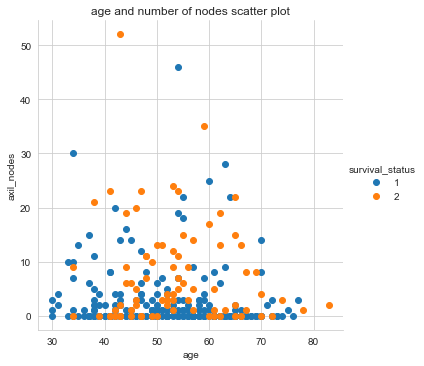

In [54]:
sns.FacetGrid(df, hue='survival_status', size = 5).map(plt.scatter, 'age','axil_nodes').add_legend()
plt.title('age and number of nodes scatter plot')
plt.show()

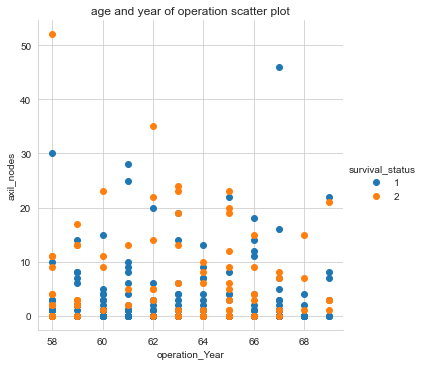

In [55]:
sns.FacetGrid(df, hue = 'survival_status', size = 5).map(plt.scatter, 'operation_Year','axil_nodes').add_legend()
plt.title('age and year of operation scatter plot')
plt.show()

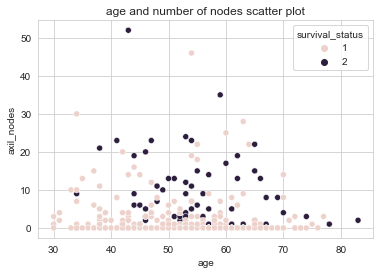

In [56]:
sns.scatterplot(df['age'], df['axil_nodes'], hue= df['survival_status'])
plt.title('age and number of nodes scatter plot')
plt.show()

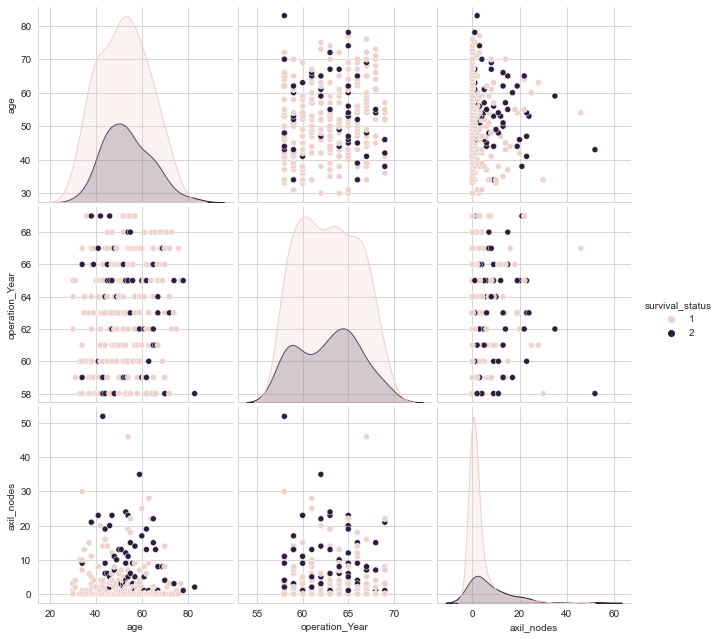

In [58]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = "survival_status", size = 3)

plt.show()

No observation shows a clear or significant bifurcation in dataset plots.

### 1.5 Summarizing final conclusions of the Exploration

1. Features operation_Year and age are not good classifiers.
2. Number of nodes do show some significant relationship with survival status.
3. As can be seen that highest survival status = 1 is at 0 to 10 nodes. Around 70% of people with survival status 2 had 0 to 10 nodes.
4. Patients with larger number of nodes had less survival chance.
5. pdf of age behaves similar to normal distribution which was expected. Survival status = 1 was found more in people between age 50 to 55 and Survival status = 2 was found more in people between age 55 to 60.
5. Need more classifiers get good model out of this data.
